# Coresponding between VGG16 layers and MIST parcels

In [1]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
import numpy as np
from load_confounds import Params24
from nilearn.input_data import NiftiLabelsMasker
import npp
import matplotlib.pyplot as plt
from nilearn.plotting  import view_img 
from sklearn.decomposition import PCA
from ridge import bootstrap_ridge
import logging
from sklearn.model_selection import train_test_split

## VGG16

In [2]:
base_model=VGG16()
#base_model.summary()
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
fMRI_Data= np.load('fMRI_Data_subject3.npy', allow_pickle=True)
Movie_Data= np.load('Movie_Data_subject3.npy', allow_pickle=True)

In [4]:
print (Movie_Data.shape, fMRI_Data.shape)

(43999, 4096) (43999, 444)


## PCA, number of components=2000

In [5]:

pca = PCA(n_components=2000)
Movie_PCA = pca.fit_transform(Movie_Data)
#np.save('Movie_PCA_2000.npy', Movie_PCA)
#Movie_Data= np.load('Movie_PCA_2000.npy', allow_pickle=True)


## Windows startegy(WL= 10, stride=10)

In [6]:
Movie_Data= Movie_PCA 

T1=[]
T2=[]
T3=[]
T4=[]
T5=[]
T6=[]
T7=[]
T8=[]
T9=[]
T10=[]


for i in range(len(Movie_Data)):
     
    if i % 10==0:
        T1.append(Movie_Data[i,:]) 
        
    if i % 10==1:
        T2.append(Movie_Data[i,:])    
        
    if i % 10==2:
        T3.append(Movie_Data[i,:])
        
    if i % 10==3:
        T4.append(Movie_Data[i,:] )    

     
    if i % 10==4:
        T5.append(Movie_Data[i,:]) 
        
    if i % 10==5:
        T6.append(Movie_Data[i,:])    
        
    if i % 10==6:
        T7.append(Movie_Data[i,:])
        
    if i % 10==7:
        T8.append(Movie_Data[i,:] )          
        
          
    if i % 10==8:
        T9.append(Movie_Data[i,:]) 
        
    if i % 10==9:
        T10.append(Movie_Data[i,:])    
        
  
m1=min(len(T1), len(T2), len(T3),len(T4),len(T5), len(T6), len(T7), len(T8), len(T9), len(T10)) 
  
T1_D= np.array(T1[0:m1])
T2_D= np.array(T2[0:m1])
T3_D= np.array(T3[0:m1])
T4_D= np.array(T4[0:m1])
T5_D= np.array(T5[0:m1])
T6_D= np.array(T6[0:m1])
T7_D= np.array(T7[0:m1])
T8_D= np.array(T8[0:m1])
T9_D= np.array(T9[0:m1])
T10_D= np.array(T10[0:m1])

In [7]:
print(T1_D.shape, T2_D.shape, T3_D.shape,T4_D.shape,T5_D.shape, T6_D.shape, T7_D.shape, T8_D.shape, T9_D.shape, T10_D.shape)

(4399, 2000) (4399, 2000) (4399, 2000) (4399, 2000) (4399, 2000) (4399, 2000) (4399, 2000) (4399, 2000) (4399, 2000) (4399, 2000)


In [8]:
fMRI_Data
fMRI_label=[]

for i in range(len(fMRI_Data)):
       
        
    if i % 10==9:
        fMRI_label.append(fMRI_Data[i,:]) 
       
      
fMRI_label= np.array(fMRI_label)

In [9]:
fMRI_label.shape

(4399, 444)

In [10]:
Xx1=np.hstack((T1_D,T2_D,T3_D,T4_D,T5_D,T6_D,T7_D,T8_D,T9_D,T10_D))

x_train,x_test, y_train, y_test = train_test_split(Xx1, fMRI_label , test_size=0.1)
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(3959, 20000) (440, 20000) (3959, 444) (440, 444)


In [11]:
from ridge import bootstrap_ridge
import logging

logging.basicConfig(level=logging.INFO)


alphas = np.logspace(0, 4, 10) # Equally log-spaced alphas between 10 and 1000

wt, corr, alphas, bscorrs, valinds = bootstrap_ridge(x_train, y_train,
                                                     x_test, y_test,
                                                     alphas, nboots=1, chunklen=40, nchunks=20,
                                                    singcutoff=1e-10, single_alpha=True)

INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing SVD...
INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (3159, 3159))
INFO:ridge_corr:Training stimulus has LSV norm: 1725.610
INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.018
INFO:ridge_corr:Training: alpha=1.000, mean corr=0.03412, max corr=0.20941, over-under(0.20)=1
INFO:ridge_corr:Training: alpha=2.783, mean corr=0.03418, max corr=0.20969, over-under(0.20)=1
INFO:ridge_corr:Training: alpha=7.743, mean corr=0.03464, max corr=0.21178, over-under(0.20)=1
INFO:ridge_corr:Training: alpha=21.544, mean corr=0.03795, max corr=0.22598, over-under(0.20)=1
INFO:ridge_corr:Training: alpha=59.948, mean corr=0.05535, max corr=0.28435, over-under(0.20)=9
INFO:ridge_corr:Training: alpha=166.810, mean corr=0.09433, max corr=0.37296, over-under(0.20)=46
INFO:ridge_corr:Training: alpha=464.159, mean corr=0.12235, max corr=0.41123, over-under(0.20)=84
INFO:ridge_corr:Training: alpha=1291.550, mean

(20000, 444)
(444,)


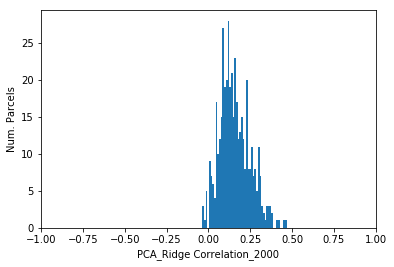

In [12]:
print(wt.shape)

pred_test = x_test.dot(wt)

Ridge_correlations = npp.mcorr(y_test, pred_test)

print(Ridge_correlations.shape)

plt.hist(Ridge_correlations, 50)
plt.xlim(-1, 1)
plt.xlabel("PCA_Ridge Correlation_2000")
plt.ylabel("Num. Parcels");

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1



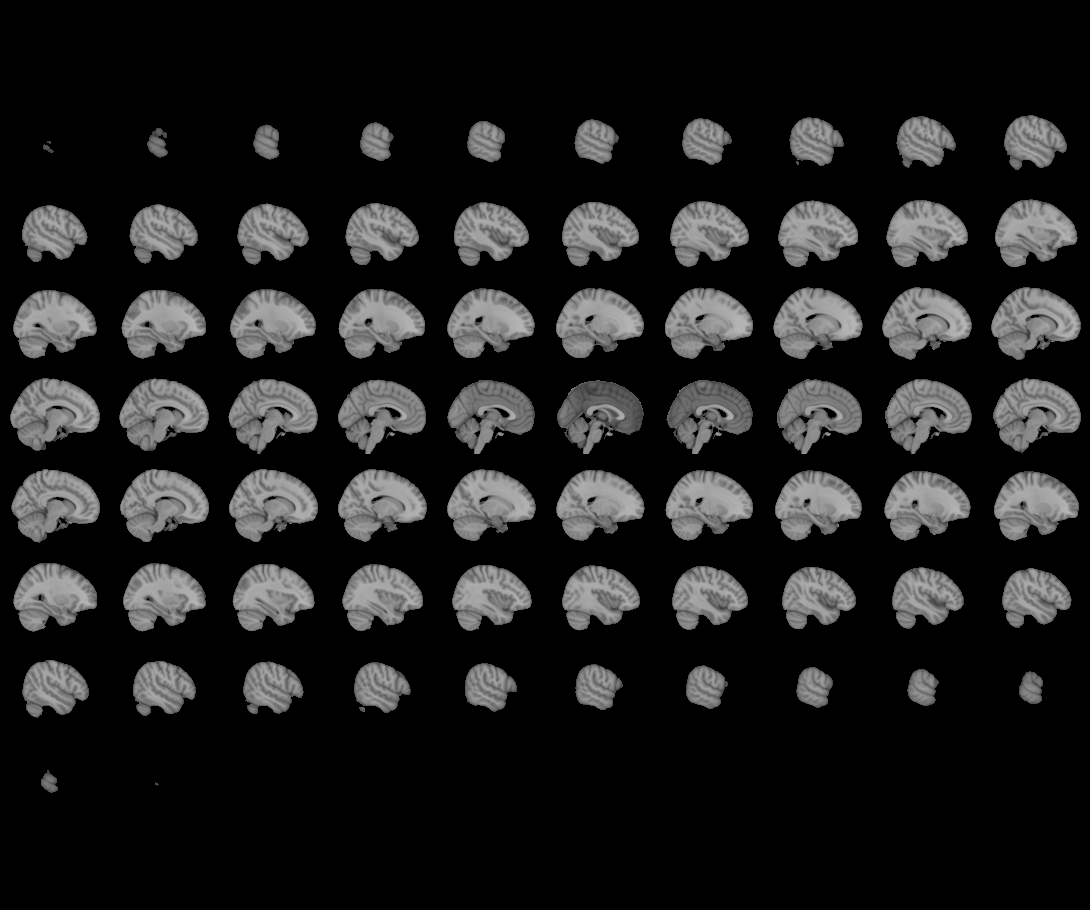
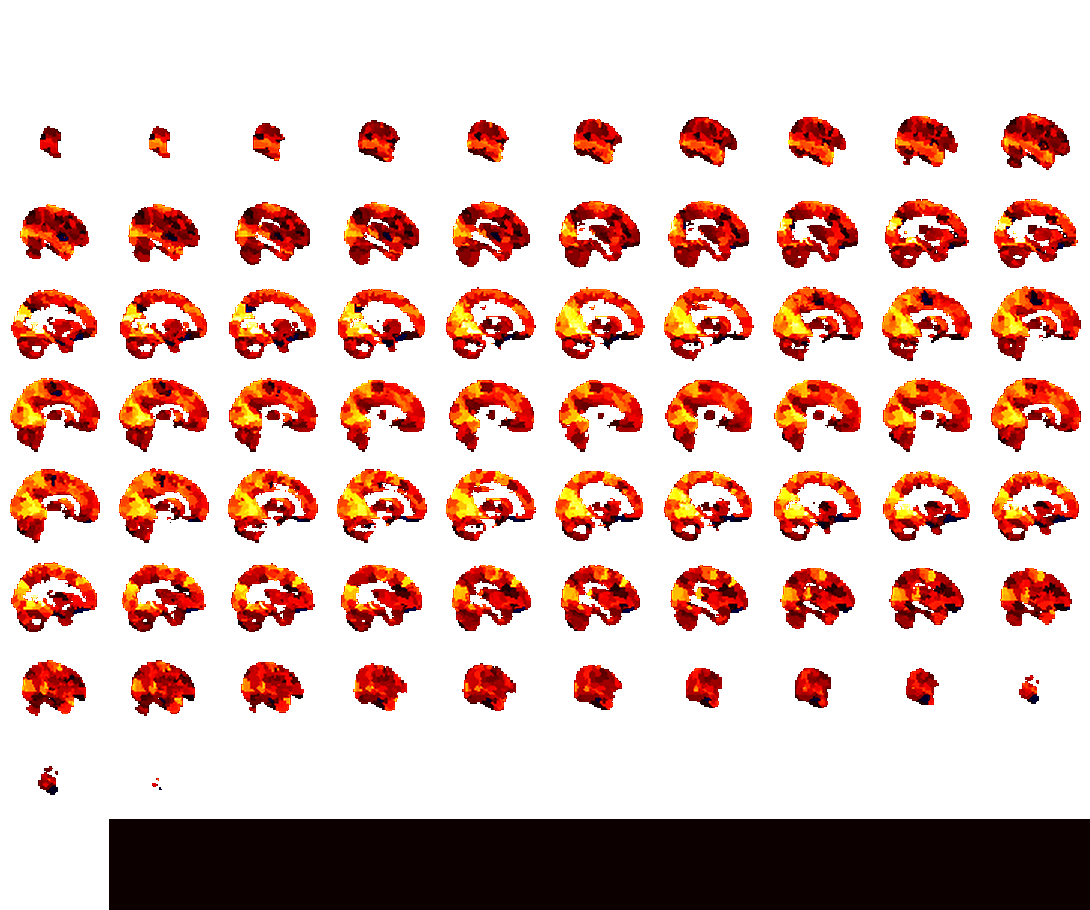

In [13]:
masker= NiftiLabelsMasker(labels_img='MIST_444.nii.gz', standardize=True, detrend=False, smoothing_fwhm=8).fit()
r2_img = masker.inverse_transform([Ridge_correlations])
view_img(r2_img)